# Problem Statement
This project aims to document the challenges, errors, and trial-and-error experiences encountered during the process of developing a data scraping and sentiment analysis project. By sharing these insights, the project seeks to provide guidance and solutions for fellow coders facing similar hurdles in their endeavors.

Additionally, for e-commerce companies striving to enhance customer satisfaction through a deeper understanding of customer sentiments expressed in reviews, this notebook serves as a valuable resource. By identifying the pivotal factors influencing both positive and negative sentiments, the project offers actionable insights to refine products and services, ultimately fostering a more satisfying customer experience.

# Project Scenario
Recently, I finished reading the life-changing book "**Atomic Habits**" by James Clear. As this book significantly altered my daily life, work habits, and ability to build positive routines, I became curious about others' perspectives. After searching online, I found the book on **Amazon** and noticed a mix of reviews from readers. Inspired by this, I devised a plan to **scrape these reviews, analyze the sentiments expressed by customers, and identify the factors influencing both positive and negative feedback.**

# Project Goal
- Analyze customer sentiment from e-commerce website (Amazon) reviews to understand factors driving feedback.
- Provide insights into customer preferences and concerns for data driven decision-making.

## Deliverables/ Steps to Complete the Project
- **Data Collection**: extract customer reviews and additional data from popular e-commerce websites.
- **Data Cleaning & Preprocessing:** Handle missing values, duplicates, and irrelevant features; perform text preprocessing tasks.
- **Sentiment Analysis:** Analyze sentiment using NLP techniques.
- **Feature Engineering**: Extract features from text data and incorporate additional features.
- **Machine Learning Modeling**: Build models to predict sentiment.
- **Data Visualization and Interpretation:** Visualize sentiment analysis results and feature importance.
- **Solution and Recommendations:** Summarize findings and provide actionable recommendations.

# Stakeholders: (For whoom is the CUSTOMER SENTIMENT ANALYSIS?)

1. **Retailers**: Whether it's on Amazon, Flipkart, or Shopify, retailers can benefit greatly from understanding customer sentiments. By learning from this project, they can refine their product offerings and marketing strategies to create happier customers and drive more sales.

2. **Authors & Publishers**: Understanding how readers feel about their work is vital for authors and publishers. By uncovering insights from customer sentiments, they can improve future books, connect better with their audience, and boost sales and loyalty.

3. **Data Enthusiasts**: Scraping Amazon reviews was no easy feat, and I realized there's a lack of accessible tutorials out there. So, I'm creating a comprehensive guide to help others navigate through similar challenges and empower fellow data enthusiasts in their projects.

# PART ONE: Data Scraping

**What are the available ways to Scrape data?**

- I used **BeautifulSoup** in this project. It is the most popular package in python used to parse HTML & XML data.
- **Scrapy**: Scrapy is a powerful and flexible framework for web scraping in Python.
- **Selenium**: a popular tool, Selenium is particularly useful for scraping websites that use JavaScript to generate content dynamically.
- **Puppeteer** (for JavaScript): provides a high-level API for controlling headless Chrome or Chromium browsers. It can be used for tasks such as web scraping, automated testing, and generating screenshots of web pages.
- **APIs**: Some websites offer APIs (Application Programming Interfaces) that allow developers to access data in a structured format without needing to scrape HTML.
- **Commercial scraping tools**: Tools such as Mozenda, ParseHub, and Content Grabber, which offer features like point-and-click interfaces, scheduling, and data export options.
- **Autoparser**: automate web scrapping
- **Octoparse**: an easy tool to use without any coding
- **AI tools**: If you're using Chatgpt 4, you can simply upload the Amazon HTML file and give a prompt, it will do the work for you.
- and many more!!!!

Now, it's your choice to get your hands dirty with some coding or let tools work for you.... :)

### Task 1: Data Collection
- Extract Customer Reviews and additional data from Amazon

**Imports**

For the data scraping phase, we import numpy and pandas for data manipulation, BeautifulSoup for HTML parsing, requests for fetching web pages, sys for system-related tasks, and html for handling HTML-specific operations.  These libraries collectively provide the necessary tools to efficiently extract and manipulate data from web sources for further analysis.

In [ ]:
# Imports
# Imports for data manipulation
import numpy as np
import pandas as pd

# Imports for web-scrapping
from bs4 import BeautifulSoup

# Imports for Making HTTP requests
import sys, requests, html


We begin by specifying the URL of the website containing the Amazon reviews for "Atomic Habits" book. The headers are set up to mimic a regular web browser, making the request look genuine and avoiding any website restrictions. They also specify how the response data should be encoded and what type of content is expected for easy handling. With these preparations, we make an HTTP GET request to fetch the web page data using the requests library.

A special note: To get your header data, go to this website: https://httpbin.org/get

In [ ]:
# URL of the website
URL = 'https://www.amazon.com/Atomic-Habits-James-Clear-audiobook/product-reviews/B07RFSSYBH/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'

# Specify Headers
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0 Safari/537.36",
          "Accept-Encoding": "gzip, deflate, br, zstd",
          "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7",
          "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}

# Bring the data
page = requests.get(URL, headers = headers)
page

<Response [200]>

The `<Response [200]>` printed above means that the HTTP GET request to the specified URL was successful, and the server responded with a status code of 200. This is the first **metric** to see if you're going in the right track or not. If you get the following responses:
- <Response [404]>: the requested resource was not found on the server (404 Not Found).
- <Response [403]>: access to the requested resource is forbidden (403 Forbidden).
- <Response [500]>: an internal server error occurred while processing the request (500 Internal Server Error).
- <Response [408]>: the server timed out while waiting for the request (408 Request Timeout).


Then, you should:
1. **Check URL**: Verify correct webpage address.
  
2. **Inspect Headers**: Review and adjust request headers.
  
3. **Ensure Connectivity**: Confirm stable internet connection.
  
4. **Review Documentation**: Refer server error messages.
  
5. **Implement Error Handling**: Use try-except blocks for errors.
  
6. **Retry Mechanism**: Consider retrying failed requests.
  
7. **Contact Support**: Seek assistance if issues persist.

In [ ]:
# use beautiful soup to parse the data from page
soup = BeautifulSoup(page.content, "html.parser")

# get an idea of what is the size of the Soup1 in bytes
sys.getsizeof(soup)

48

**LET'S SEE if our fetched page source html matches our destination source format or not!**

We use **BeautifulSoup** now to parse the webpage data obtained from the HTTP GET request, converting it into a structured format and saved it in  `soup` variable. Then, we run the sys.getsizeof() function to check the size of the soup, it is 48 **bytes** only.

In [ ]:
# Let's see what is the parsed soup is about
# print(soup) - we commented it because it prints the whole page html content which is too long. To run, just remove # and run the print function

If we closely monitor some of the tags and text, we can verify that the parser could parse HTML data from the website.

Next, we improve the formatting of the parsed data using the **prettify()** method, which enhances readability by structuring the HTML content in a more organized manner.

> Let's see if we can extract our Book Title.
To extract this, access the title tag within the prettified HTML content using `soup2.title`, which returns the title along with HTML tags.

> To obtain only the text content of the title without HTML tags, we use `.text.strip()` method. The resulting `title` variable contains the title of the webpage as a string. Finally, we print the title and its data type.



In [ ]:
# get the title
# soup2.title prints the title with the html tags which we need to get rid of
title = soup2.title.text.strip()
print(title)
print(type(title))

Amazon.com: Customer reviews: Atomic Habits: An Easy &amp; Proven Way to Build Good Habits &amp; Break Bad Ones
<class 'str'>


In [ ]:
# prettify makes the data a little bit better formatted
soup2 = BeautifulSoup(soup.prettify(), "html.parser")

In [ ]:
# Let's work on the Fetched Title and make it better

# Selecting parts from the third part onwards
main_title_parts = title.split(":")[1:] # [2:] that gives only the book title
print(main_title_parts)

# Joining the parts with ":" and stripping with whitespace
main_title = ":".join(main_title_parts).strip()
print(main_title)

# Unescaping HTML entities
main_title = html.unescape(main_title)

print("Main Title:", main_title)


[' Customer reviews', ' Atomic Habits', ' An Easy &amp; Proven Way to Build Good Habits &amp; Break Bad Ones']
Customer reviews: Atomic Habits: An Easy &amp; Proven Way to Build Good Habits &amp; Break Bad Ones
Main Title: Customer reviews: Atomic Habits: An Easy & Proven Way to Build Good Habits & Break Bad Ones


You can also fetch and work with the tags such as '**a-profile-name**' to get the names of the reviews but then it is a **matter of fetching personal information and ethical concern**. We do not need this. So, we directly work on fetching the reviews only. But feel free to play with tags and get **review-stars, review-title,** etc.

We will get the Review Titles of the First page.

 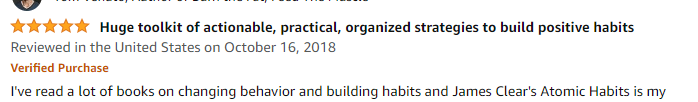

In [ ]:
review_titles = soup2.find_all('a', class_='a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold')
title_review

[<a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/RGAVUWKBZKTQ1/ref=cm_cr_arp_d_rvw_ttl?ie=UTF8&amp;ASIN=B07RFSSYBH">
 <i class="a-icon a-icon-star a-star-5 review-rating" data-hook="review-star-rating">
 <span class="a-icon-alt">
                   5.0 out of 5 stars
                  </span>
 </i>
 <span class="a-letter-space">
 </span>
 <span>
                  Updated review after 100 days building small yet lasting habits.
                 </span>
 </a>,
 <a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/R1WFOC833OWEC9/ref=cm_cr_arp_d_rvw_ttl?ie=UTF8&amp;ASIN=B07RFSSYBH">
 <i class="a-icon a-icon-star a-star-5 review-rating" data-hook="review-star-rating">
 <span class="a-icon-alt">
                   5.0 out of 5 stars
                  </span>
 </i>
 <span class="a-letter-space">
 </sp

In [ ]:
review_titles2  = soup2.find_all('a', class_ = 'review-title')
review_titles2

[<a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/RGAVUWKBZKTQ1/ref=cm_cr_arp_d_rvw_ttl?ie=UTF8&amp;ASIN=B07RFSSYBH">
 <i class="a-icon a-icon-star a-star-5 review-rating" data-hook="review-star-rating">
 <span class="a-icon-alt">
                   5.0 out of 5 stars
                  </span>
 </i>
 <span class="a-letter-space">
 </span>
 <span>
                  Updated review after 100 days building small yet lasting habits.
                 </span>
 </a>,
 <a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/R1WFOC833OWEC9/ref=cm_cr_arp_d_rvw_ttl?ie=UTF8&amp;ASIN=B07RFSSYBH">
 <i class="a-icon a-icon-star a-star-5 review-rating" data-hook="review-star-rating">
 <span class="a-icon-alt">
                   5.0 out of 5 stars
                  </span>
 </i>
 <span class="a-letter-space">
 </sp

Seems like it worked but got also uncessary HTML tags. We will again do the same process for removing html tags and only get the text by get_text and strip methods.

In [ ]:
review_title = [title.get_text(strip=True).split(' out of 5 stars', 1)[-1] for title in review_titles2]
review_title

['Updated review after 100 days building small yet lasting habits.',
 'Excellent book',
 'Huge toolkit of actionable, practical, organized strategies to build positive habits',
 'good book',
 'Life changing advice and strategies!',
 'In my top 5!',
 'Distilled and clear ideas made into a simple system of behavior change. Top notch!',
 'Best personal improvement, business, and self-help books I’ve read',
 'Way better than I was expecting',
 'Atomic Habits will change your life! 9 takeaways:']

So, these are the **titles** of the reviews on the first pages. Nice work!

**LET'S NOW EXPLORE THE REVIEW CONTENT ELEMENTS. But wait! Are you thinking of how are you going to know this tag will give me that content?** This is the part I spent hours to find out the exact tag that i wanted. You can click on a review title and and right click to inspect element, there look for the mother tag of the item that you selected. By observing thus, i am pretty sure you will be able to identify the review tags. Otherwise, just follow along with the steps.... ✨


In [ ]:
review_elements = soup2.select("div.review")
# review_elements

After checking with the inspect element, we got to know he right class tag for the review content is : **'a-size-base review-text review-text-content'** under the span tag. Please be careful - for your case, the class and mother tag might be different. If you're unable to find out the review tag because of too much nested html tags, just copy a block of review and ask **ChatGPT** to find out the tag for you!!!  ☝



In [ ]:
review_texts = soup2.find_all('span', {'class': 'a-size-base review-text review-text-content'})
review_texts

[<span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>
                  I previously wrote this review right after reading the book.  Today, February 15th, after applying James’s system for 100 days on a few tiny habits, I feel compelled to share updates with you because they have sincerely worked.
                  <br/>
 <br/>
                  I will divide the review into 5 parts.  The first part is a summary of the book with short excerpts highlighted while taking notes.  Next, I hope to share pieces of advice that have motivated me while building new habits.  Following that, I will share how I implemented the first 3 habits throughout these months.  Then, some thoughts to whom I would recommend reading the book.  Last, there are 4 complementary readings.
                  <br/>
 <br/>
                  SUMMARY
                  <br/>
 <br/>
                  [Introduction]  James starts by sharing personal strategies he implemented to recover

**GET All the reviews of the first page without unnecessary html tags**

In [ ]:
# Extract and print review text of the FIRST PAGE
reviews = []
for review_text in review_texts:
    reviews.append(review_text.get_text(strip=True))

In [ ]:
 # please delete the # to run and see the reviews data.
 # reviews

If you do not wish to scrape other pages of data and only stick to the first page, you are already good to go! Just convert the list into a dataframe and play with that.... :)

In [ ]:
df = pd.DataFrame({'Reviews':reviews})

In [ ]:
df

,Reviews
0,I previously wrote this review right after rea...
1,"""Atomic Habits"" by James Clear is a transforma..."
2,I've read a lot of books on changing behavior ...
3,Very insightful and easy to read. It’s crazy h...
4,"""Atomic Habits"" by James Clear is pretty much ..."
5,"James Clear’s ""Atomic Habits"" is nothing short..."
6,I began reading this book with very high expec...
7,Yes! It's one of the best personal improvement...
8,"I've never been a huge of of the ""self-help"" w..."
9,Atomic Habits by James Clear is one of those r...


## Task: Scrape reviews for multiple pages
This is where you might end up spending hours to find a good tutorial or a blog post, as it sounds involving too much of programming but trust me, if you just paid attention and got until this, you already got over the most toughest part. I wrote the functions below in a way it will give a recap of what we have done so far!

I scraped the reviews of my favorite book from multiple pages by this 3 steps:
1. defined scrape_reviews function
2. defined scrape_reviews_from_multiple_pages
3. Call the functions with the URL and Number of pages

In [ ]:
def scrape_reviews(url):
  """
  Scrapes reviews from a single page.

  Args:
  - url (str): The URL of the webpage containing the reviews.

  Returns:
  - reviews (list): A list of review texts extracted from the webpage
  """
  # Make HTTP Get request to fetch the webpage
  page = requests.get(url, headers = headers)

  # Parse the HTML content
  soup = BeautifulSoup(page.content, "html.parser")

  # Pretty the soup content
  soup = BeautifulSoup(soup.prettify())

  # Find all review texts
  review_texts = soup.find_all('span', {'class': 'a-size-base review-text review-text-content'})

  # Extract review texts and strip whitspaces
  reviews = [review.get_text(strip=True) for review in review_texts]

  return reviews


In [ ]:
def scrape_reviews_from_multiple_pages(url, num_pages):
  """
  Scrapes reviews from multiple pages.

    Args:
    - url (str): The URL of the webpage containing the reviews.
    - num_pages (int): The number of pages to scrape reviews from.

    Returns:
    - all_reviews (list): A list of all review texts extracted from the specified number of pages.
    """
  # Initialize an empty list to store all reviews
  all_reviews=[]

  # Iterate over each page and scrape reviews
  for page_number in range(1, num_pages+1):
    # Construct the URL for the current page
    url = f"{url}&pageNumber={page_number}"

    # Scrape reviews from the current page
    reviews_on_page = scrape_reviews(url)

    # Add reviews from the current page to the list of all reviews
    all_reviews.extend(reviews_on_page)


  return all_reviews

In [ ]:
%%time
# Print all reviews
url = URL
num_pages = 1000
all_reviews = scrape_reviews_from_multiple_pages(url, num_pages)


CPU times: user 3min 34s, sys: 1.78 s, total: 3min 36s
Wall time: 6min 16s


In [ ]:
len(all_reviews)

4610

Despite defining the number of pages to scrape as 1000, I encountered a unknown problem. 1000 pages could scrape 4609 reviews, which in reality is not true.  Every review page of Amazon for the book contains 10 reviews, at max we need 47 pages to scrape right? But if it is for the scrapping process, or pagination problem, I solved the problem temporarily by increasing the number of pages to 1000 so that i get a lot of numbers of reviews to work for sentiment analysis.

In [ ]:
# Convert the scraped data into a dataframe
df2 = pd.DataFrame({'Reviews': all_reviews})
df2.shape

(4610, 1)

In [ ]:
# Check the values
df2

,Reviews
0,I previously wrote this review right after rea...
1,"""Atomic Habits"" by James Clear is a transforma..."
2,I've read a lot of books on changing behavior ...
3,Very insightful and easy to read. It’s crazy h...
4,"""Atomic Habits"" by James Clear is pretty much ..."
...,...
4605,"James Clear’s ""Atomic Habits"" is nothing short..."
4606,I began reading this book with very high expec...
4607,Yes! It's one of the best personal improvement...
4608,"I've never been a huge of of the ""self-help"" w..."


**This step is manadatory,** Either you do not wish to do sentiment analysis and stop after the successful of data scrapping, **YOU SHOULD SAVE YOUR DATA in a csv or EXCEL file**. The reason is that as we are not using any proxy ip, Amazon will eventually detect our browser as a robot and ban of accessing any content. If you use the scrapping process multiple times for multiple projects and face this situation, either you need to change your computer, try later, or buy a service like SOAX to get proxy addresses.

In [ ]:
# Save the file as a csv file
df2.to_csv("CustomerReviews.csv")

In [ ]:
# Save the file as an excel file
df2.to_excel("CustomerReviews.xlsx")


# Part Two


### This part has been done as a second part of this project on a different notebook.